In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 

$$
\left[-\frac{1}{2}\nabla^2  - \frac{1}{r} \right]\psi = E \psi
$$

$$
\ddot{x}(t) = -2(\frac{1}{r} + E) x(t)
$$

$$
x(0) = 0, x(\infty) = 0
$$

In [2]:
# def numerov(E, x_last, dx_last):
    
#     f = lambda t: -2*(1/t + E)
    
#     aux1 = lambda current, h: 1 - h**2 * f(current + h) / 12
#     aux2 = lambda current, h: 1 - h**2 * f(current + h) / 6
#     aux3 = lambda current, h: 2 + 5 * h**2 * f(current) / 6
    
#     x_h = lambda current, h, x_last, dx_last: aux3(current, h) * aux1(current, -h) * x_last

In [22]:
f = lambda t: -2*(1/t + E)
    
aux1 = lambda current, h: 1 - h**2 * f(current + h) / 12
aux2 = lambda current, h: 1 - h**2 * f(current + h) / 6
aux3 = lambda current, h: 2 + 5 * h**2 * f(current) / 6

numerator = lambda current, h, x_current, dx_current: aux3(current, h) * aux1(current, -h) * x_current + 2 * h * dx_current * aux2(current, -h)
denominator = lambda current, h: aux1(current, h) * aux2(current, -h) + aux1(current, -h) * aux2(current, h)


numer = lambda current, h, x_current, dx_current: numerator(current, h, x_current, dx_current) / denominator(current, h)
numer_du = lambda current, h, x_prev, x_next: (aux2(current, h) * x_next - aux2(current, -h) * x_prev) / (2*h)

In [56]:
aux1(0., 0.1)

1.0158333333333334

In [57]:
aux2(0, 0.1)

1.0316666666666667

In [60]:
aux3(0.0001, 0.1)

-164.65833333333336

In [23]:
E = -0.5

In [24]:
from tqdm import tqdm

In [93]:
x_values = []
r_values = []

current = 0.000002
h = 0.000001
x_current = 0.00001
dx_current = 100
x_prev = numer(current, -h, x_current, dx_current)
for i in tqdm(range(1000000)):
    
    
    
    x_next = numer(current, h, x_current, dx_current)
    dx_next = numer_du(current, h, x_prev, x_next)
    
    current = current + h
    x_prev = x_current
    x_current = x_next
    dx_current = dx_next
    
    r_values.append(current)
    x_values.append(x_next)
    
    


100%|█████████████████████████████| 1000000/1000000 [00:02<00:00, 340792.30it/s]


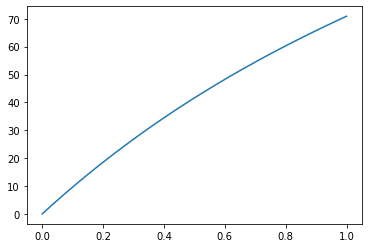

In [94]:
plt.plot(r_values[:], x_values[:])

In [95]:
r_values

[3e-06,
 4e-06,
 4.9999999999999996e-06,
 5.999999999999999e-06,
 6.999999999999999e-06,
 8e-06,
 9e-06,
 1e-05,
 1.1000000000000001e-05,
 1.2000000000000002e-05,
 1.3000000000000003e-05,
 1.4000000000000003e-05,
 1.5000000000000004e-05,
 1.6000000000000003e-05,
 1.7000000000000003e-05,
 1.8000000000000004e-05,
 1.9000000000000004e-05,
 2.0000000000000005e-05,
 2.1000000000000006e-05,
 2.2000000000000006e-05,
 2.3000000000000007e-05,
 2.4000000000000007e-05,
 2.5000000000000008e-05,
 2.600000000000001e-05,
 2.700000000000001e-05,
 2.800000000000001e-05,
 2.900000000000001e-05,
 3.000000000000001e-05,
 3.100000000000001e-05,
 3.2000000000000005e-05,
 3.3e-05,
 3.4e-05,
 3.5e-05,
 3.5999999999999994e-05,
 3.699999999999999e-05,
 3.799999999999999e-05,
 3.8999999999999986e-05,
 3.999999999999998e-05,
 4.099999999999998e-05,
 4.199999999999998e-05,
 4.2999999999999975e-05,
 4.399999999999997e-05,
 4.499999999999997e-05,
 4.5999999999999966e-05,
 4.699999999999996e-05,
 4.799999999999996e-0

In [96]:
x_values

[0.00010999999416668004,
 0.00020999996062508243,
 0.0003099998865488635,
 0.0004099997638373781,
 0.0005099995877572951,
 0.0006099993547001618,
 0.0007099990621161208,
 0.0008099987079564427,
 0.0009099982906209699,
 0.0010099978087827653,
 0.0011099972613455129,
 0.0012099966473766784,
 0.0013099959660790648,
 0.0014099952167602838,
 0.0015099943988148238,
 0.0016099935117078528,
 0.0017099925549638939,
 0.0018099915281572455,
 0.0019099904309046432,
 0.0020099892628591544,
 0.0021099880237052658,
 0.0022099867131547828,
 0.0023099853309434303,
 0.0024099838768279883,
 0.002509982350583873,
 0.002609980752003069,
 0.002709979080892363,
 0.002809977337071815,
 0.0029099755203734388,
 0.0030099736306400436,
 0.0031099716677242305,
 0.003209969631487501,
 0.0033099675217994782,
 0.0034099653385372096,
 0.0035099630815845512,
 0.0036099607508316193,
 0.0037099583461742947,
 0.003809955867513783,
 0.003909953314756213,
 0.004009950687812283,
 0.004109947986596931,
 0.004209945211029041,
